# Sieci RNN

### Rekurencyjne sieci neuronowe (RNN) to rodzaj sieci neuronowych zaprojektowanych do przetwarzania sekwencji danych, takich jak tekst, dane czasowe czy sygnały.

0) Twórcy: David Rumelhart, Geoffrey Hinton, Ronald J. Williams
Publikacja: "Learning representations by back-propagating errors"
Publikacja: Nature (1986), DOI: 10.1038/323533a0

1) Pamięć wewnętrzna. RNN mają pamięć wewnętrzną, która przechowuje informacje o poprzednich stanach, co pozwala na uwzględnienie kontekstu w przetwarzaniu sekwencji.

2) Struktura. Każdy krok w sekwencji jest przetwarzany przez tę samą sieć neuronową, ale z różnymi danymi wejściowymi i stanem ukrytym.

3) Zastosowania. RNN są używane w zadaniach takich jak modelowanie języka, tłumaczenie maszynowe, analiza szeregów czasowych i generowanie tekstu.

4) Problem zanikającego gradientu. Podczas uczenia głębokich RNN często występuje problem zanikającego gradientu, co utrudnia naukę długoterminowych zależności.

5) Proste RNN. Podstawowe RNN mają prostą architekturę, co jest ich zaletą, ale mają ograniczenia w przechowywaniu długoterminowych zależności.

6) Wejścia i wyjścia. RNN mogą mieć różne konfiguracje wejść i wyjść, np. jeden-wejście-jeden-wyjście (np. klasyfikacja sekwencji) lub wiele-wejść-wiele-wyjść (np. generowanie sekwencji).

7) Uczenie. RNN są uczone za pomocą algorytmu wstecznej propagacji "przez czas" ("Backpropagation Through Time", BPTT).

8) Regularyzacja. Aby zapobiec przeuczeniu, stosuje się techniki takie jak dropout lub regularyzacja L2.

9) Rozwiązania alternatywne. Choć RNN są wartościową techniką, w wielu zadaniach zostały zastąpione przez bardziej zaawansowane architektury, takie jak LSTM czy Transformery.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 27.6506 - val_loss: 5.6997
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 6.7435 - val_loss: 5.8561
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.1862 - val_loss: 5.9167
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.1505 - val_loss: 5.2287
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.1877 - val_loss: 5.4972
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.2192 - val_loss: 5.2059
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.4649 - val_loss: 5.1478
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 6.0285 - val_loss: 5.1890
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.6353 - val_loss: 5.4196
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.2852 - val_loss: 6.4497
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.0377 - val_loss: 5.1813
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.198

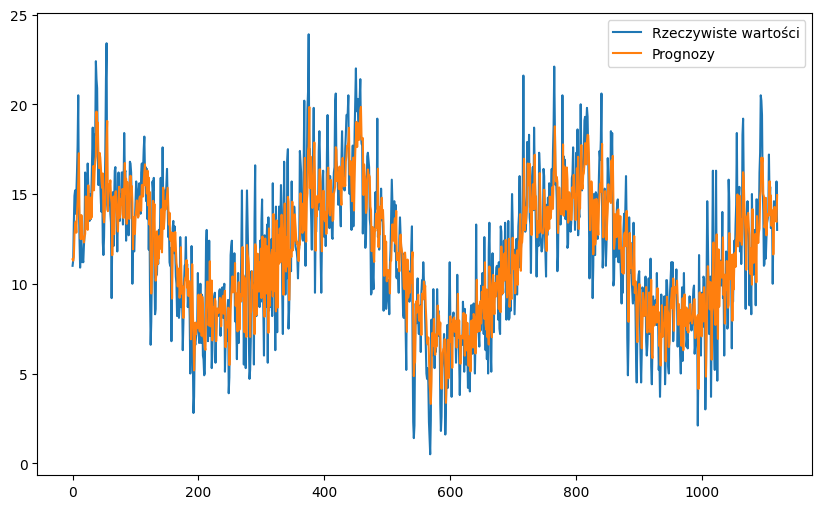

In [1]:
# Przykład

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# Pobranie danych
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Przygotowanie danych
series = data['Temp'].values
time = np.arange(len(series))

# Tworzenie sekwencji
def create_sequences(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(series, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape dla RNN

# Podział na zbiór treningowy i testowy
split_time = 2500
X_train, X_test = X[:split_time], X[split_time:]
y_train, y_test = y[:split_time], y[split_time:]

# Budowa modelu RNN
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Trenowanie modelu
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Prognozowanie
y_pred = model.predict(X_test)

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Rzeczywiste wartości')
plt.plot(y_pred, label='Prognozy')
plt.legend()
plt.show()

### Uwagi:

1. Dane. Używamy danych temperaturowych z bazy daily-min-temperatures.csv, która jest dostępna bezpłatnie w Internecie.

2. Sekwencje. Tworzymy sekwencje danych o długości window_size (30 dni) do prognozowania temperatury na następny dzień.

3. Model. Używamy prostej RNN z jedną warstwą SimpleRNN i warstwą wyjściową Dense.

4. Trening. Model jest trenowany przez 20 epok z użyciem optymalizatora Adam i funkcji straty MSE.

5. Wyniki. Wyniki są wizualizowane na wykresie, porównując rzeczywiste wartości z prognozami.

